# Detección de objetos
Para la detección de objetos, Mediapipe usa diversos modelos optimizados para realizar las predicciones, se tienen 3 arquitecturas a elección:

 - EfficientDet0
 - EfficientDet2
 - MobilenetSSD

Cada modelo tiene ciertas características de uso de memoria y cómputo, se debe elegir uno dependiendo de la aplicación.

In [18]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]    # incrementar tamaño de plots

MODEL_PATH = "models/ssd_mobilenet_v2.tflite"
base_options = python.BaseOptions(model_asset_path=MODEL_PATH)
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

In [19]:
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 4
FONT_THICKNESS = 3
TEXT_COLOR = (255, 255, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [20]:
def display_color_row(*imgs):
    for i, img in enumerate(imgs):
        print(type(img), img.dtype, img[0,0])
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img)
        plt.title(f"{i}")
        plt.xticks([])
        plt.yticks([])

<class 'numpy.ndarray'> uint8 [196 194 143]
<class 'numpy.ndarray'> uint8 [196 194 143]


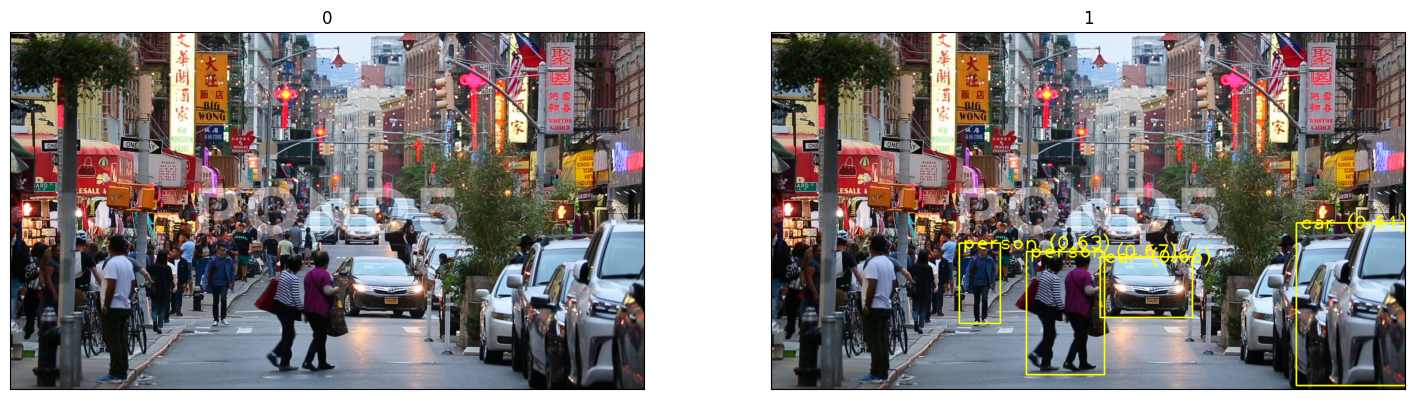

In [21]:
image = mp.Image.create_from_file("city.jpg")

detection_result = detector.detect(image)

image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)


display_color_row(image.numpy_view(), annotated_image)